In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [6]:
df =pd.read_csv('data/house-prices-advanced-regression-techniques/train.csv',index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   int64   
 17  OverallCond    1460 non-null   in

In [33]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

(0.0, 400000.0)

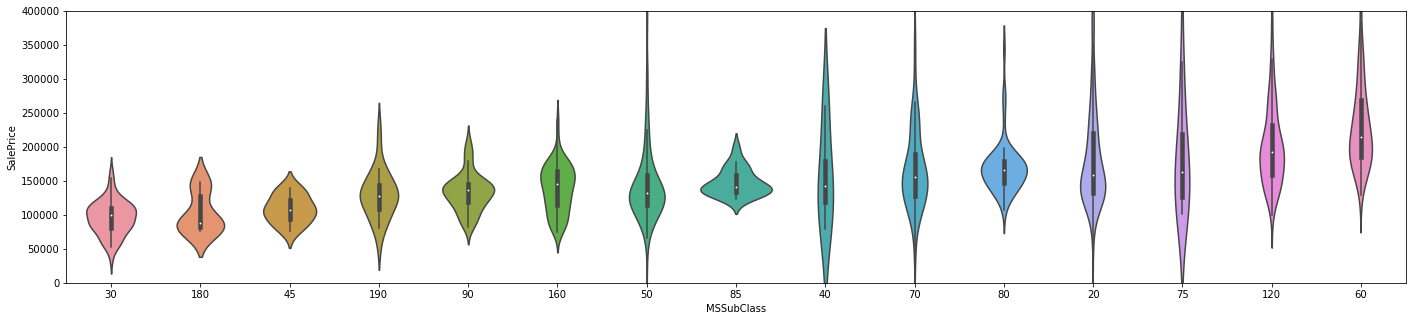

In [23]:
df['MSSubClass'] = df['MSSubClass'].astype('category')
order = df.groupby('MSSubClass')['SalePrice'].mean()
order = order.sort_values().index
fig,ax = plt.subplots(1,1)
fig.set_size_inches(24,5)
g= sns.violinplot(x='MSSubClass',y='SalePrice',data=df,ax=ax,order=order)
g.set
g.set_ylim(0,400000)

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

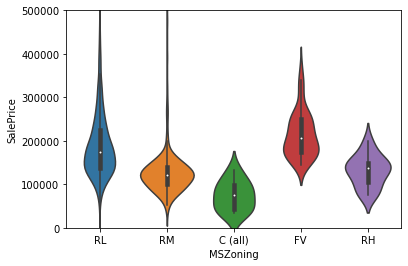

In [46]:
g= sns.violinplot(x='MSZoning',y='SalePrice',data=df)
g.set_ylim(0,500000)
df.groupby('MSZoning')['SalePrice'].mean()

In [25]:
def scatter_graphing_tool(x,y,xlim=None,ylim=None):
    g=sns.scatterplot(x=x,y=y,data=df)
    if xlim!=None:
        g.set_xlim(xlim[0],xlim[1])
    if ylim!=None:
        g.set_ylim(ylim[0],ylim[1])

        

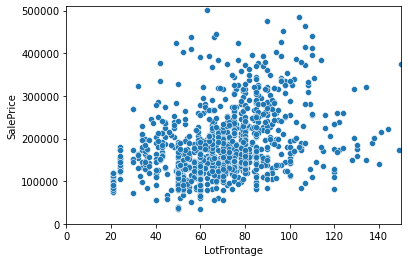

In [30]:
scatter_graphing_tool('LotFrontage','SalePrice',xlim=(0,150),ylim=(0,510000))


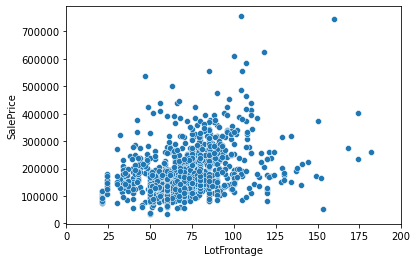

In [29]:
scatter_graphing_tool('LotFrontage','SalePrice',xlim=(0,200) )

In [54]:
df.groupby(['Street','Alley'])['SalePrice'].mean().unstack()

Alley,Grvl,Pave
Street,,
Pave,122219.08,168000.585366


<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

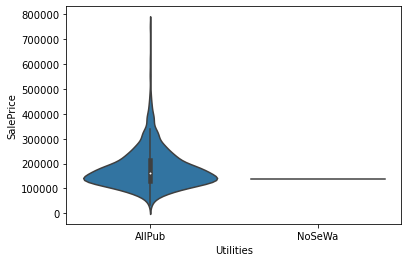

In [57]:
sns.violinplot(x='Utilities',y='SalePrice',data=df)

(0.0, 600000.0)

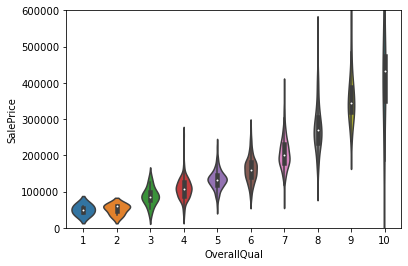

In [35]:
fig=sns.violinplot(x='OverallQual',y='SalePrice',data=df)
fig.set_ylim(0,600000)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

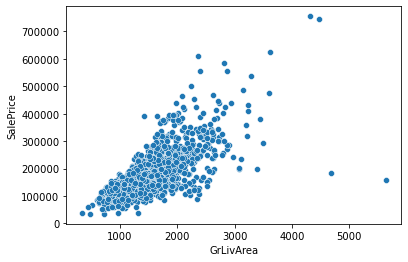

In [42]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='LogSalePrice'>

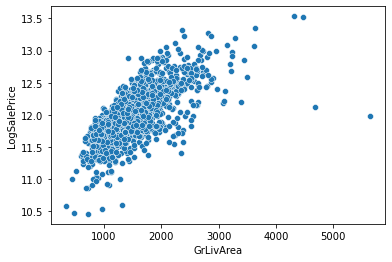

In [56]:
sns.scatterplot(x='GrLivArea', y='LogSalePrice', data=df)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

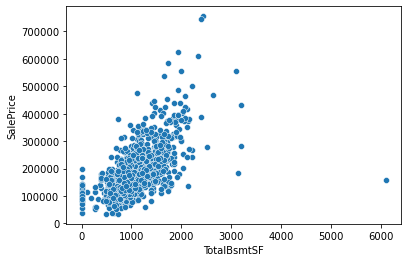

In [44]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df)


In [54]:
df['LogSalePrice'] = df['SalePrice'].map(math.log)

In [55]:
X = df[['GrLivArea']]
y=df[['LogSalePrice']]
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.49129817224671934

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

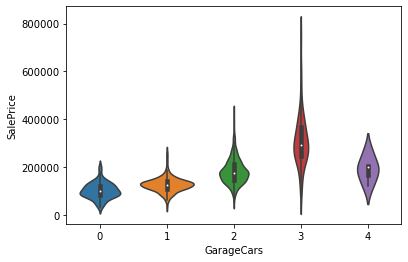

In [67]:
sns.violinplot(x='GarageCars',y = 'SalePrice',data=df)

In [68]:
df['ExterQual'] 

Id
1       Gd
2       TA
3       Gd
4       TA
5       Gd
        ..
1456    TA
1457    TA
1458    Ex
1459    TA
1460    Gd
Name: ExterQual, Length: 1460, dtype: object